In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/esercizi/loan.csv    così evito di importare il file

In [2]:
df = pd.read_csv("loan.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [6]:
# Metto come Index la colonna Loan_ID  , da fare quando ho delle timeseries
df.set_index('Loan_ID')
# si può  dropparlo 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


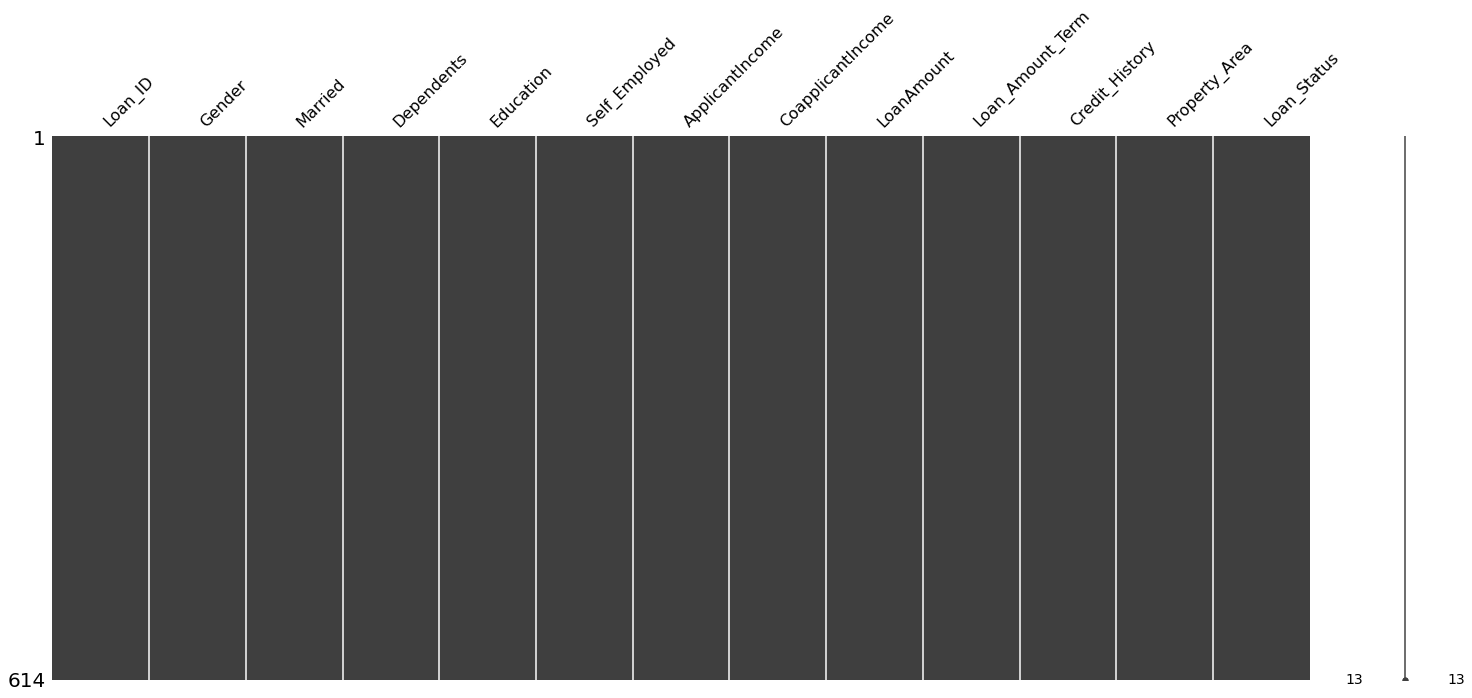

In [82]:
import missingno as msno
msno.matrix(df)

In [ ]:
#df = df.dropna() in questo caso non si può , ci sono troppi nulli

In [7]:
# Valori Nan
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#se ci sono dati numerici continui si può usare la mediana o la media
#se ci sono varialbii categoriche meglio usare la moda

In [8]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [9]:
# GENDER  - inserisco Male nei valori mancanti
df['Gender']=df['Gender'].fillna("Male")

In [10]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [11]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [12]:
# MARRIED - inserisco Yes in quelli mancanti 
df['Married']=df['Married'].fillna("Yes")

In [13]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [14]:
# DEPENDENTS - inserisco 0 in quelli mancanti 
df['Dependents']=df['Dependents'].fillna("0")

In [15]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [16]:
# SELF_EMPLOYED - inserisco 0 in quelli mancanti 
df['Self_Employed']=df['Self_Employed'].fillna("No")

In [17]:
# LOANAMOUNT inserisco la media dei valori
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean()) 

In [18]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [19]:
# LOAN_AMOUNT_TERM - Inserisco 360.0
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(360.0)

In [20]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [21]:
# CREDIT_HISTORY - Inserisco 360.0
df['Credit_History']=df['Credit_History'].fillna(1.0)

In [22]:
# Valori Nan
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [24]:
df.replace({'Gender':{'Male':0,'Female':1}, 'Married':{'Yes':1,'No':0},'Dependents':{'0':0,'1':1,'2':2,'3+':3},'Self_Employed':{'No':0,'Yes':1}}, inplace=True)

In [25]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [26]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [27]:
df.replace({'Education':{'Graduate':1,'Not Graduate':0}, 'Property_Area':{'Semiurban':0,'Urban':1,"Rural":2},'Loan_Status':{'Y':1,'N':0}}, inplace=True)

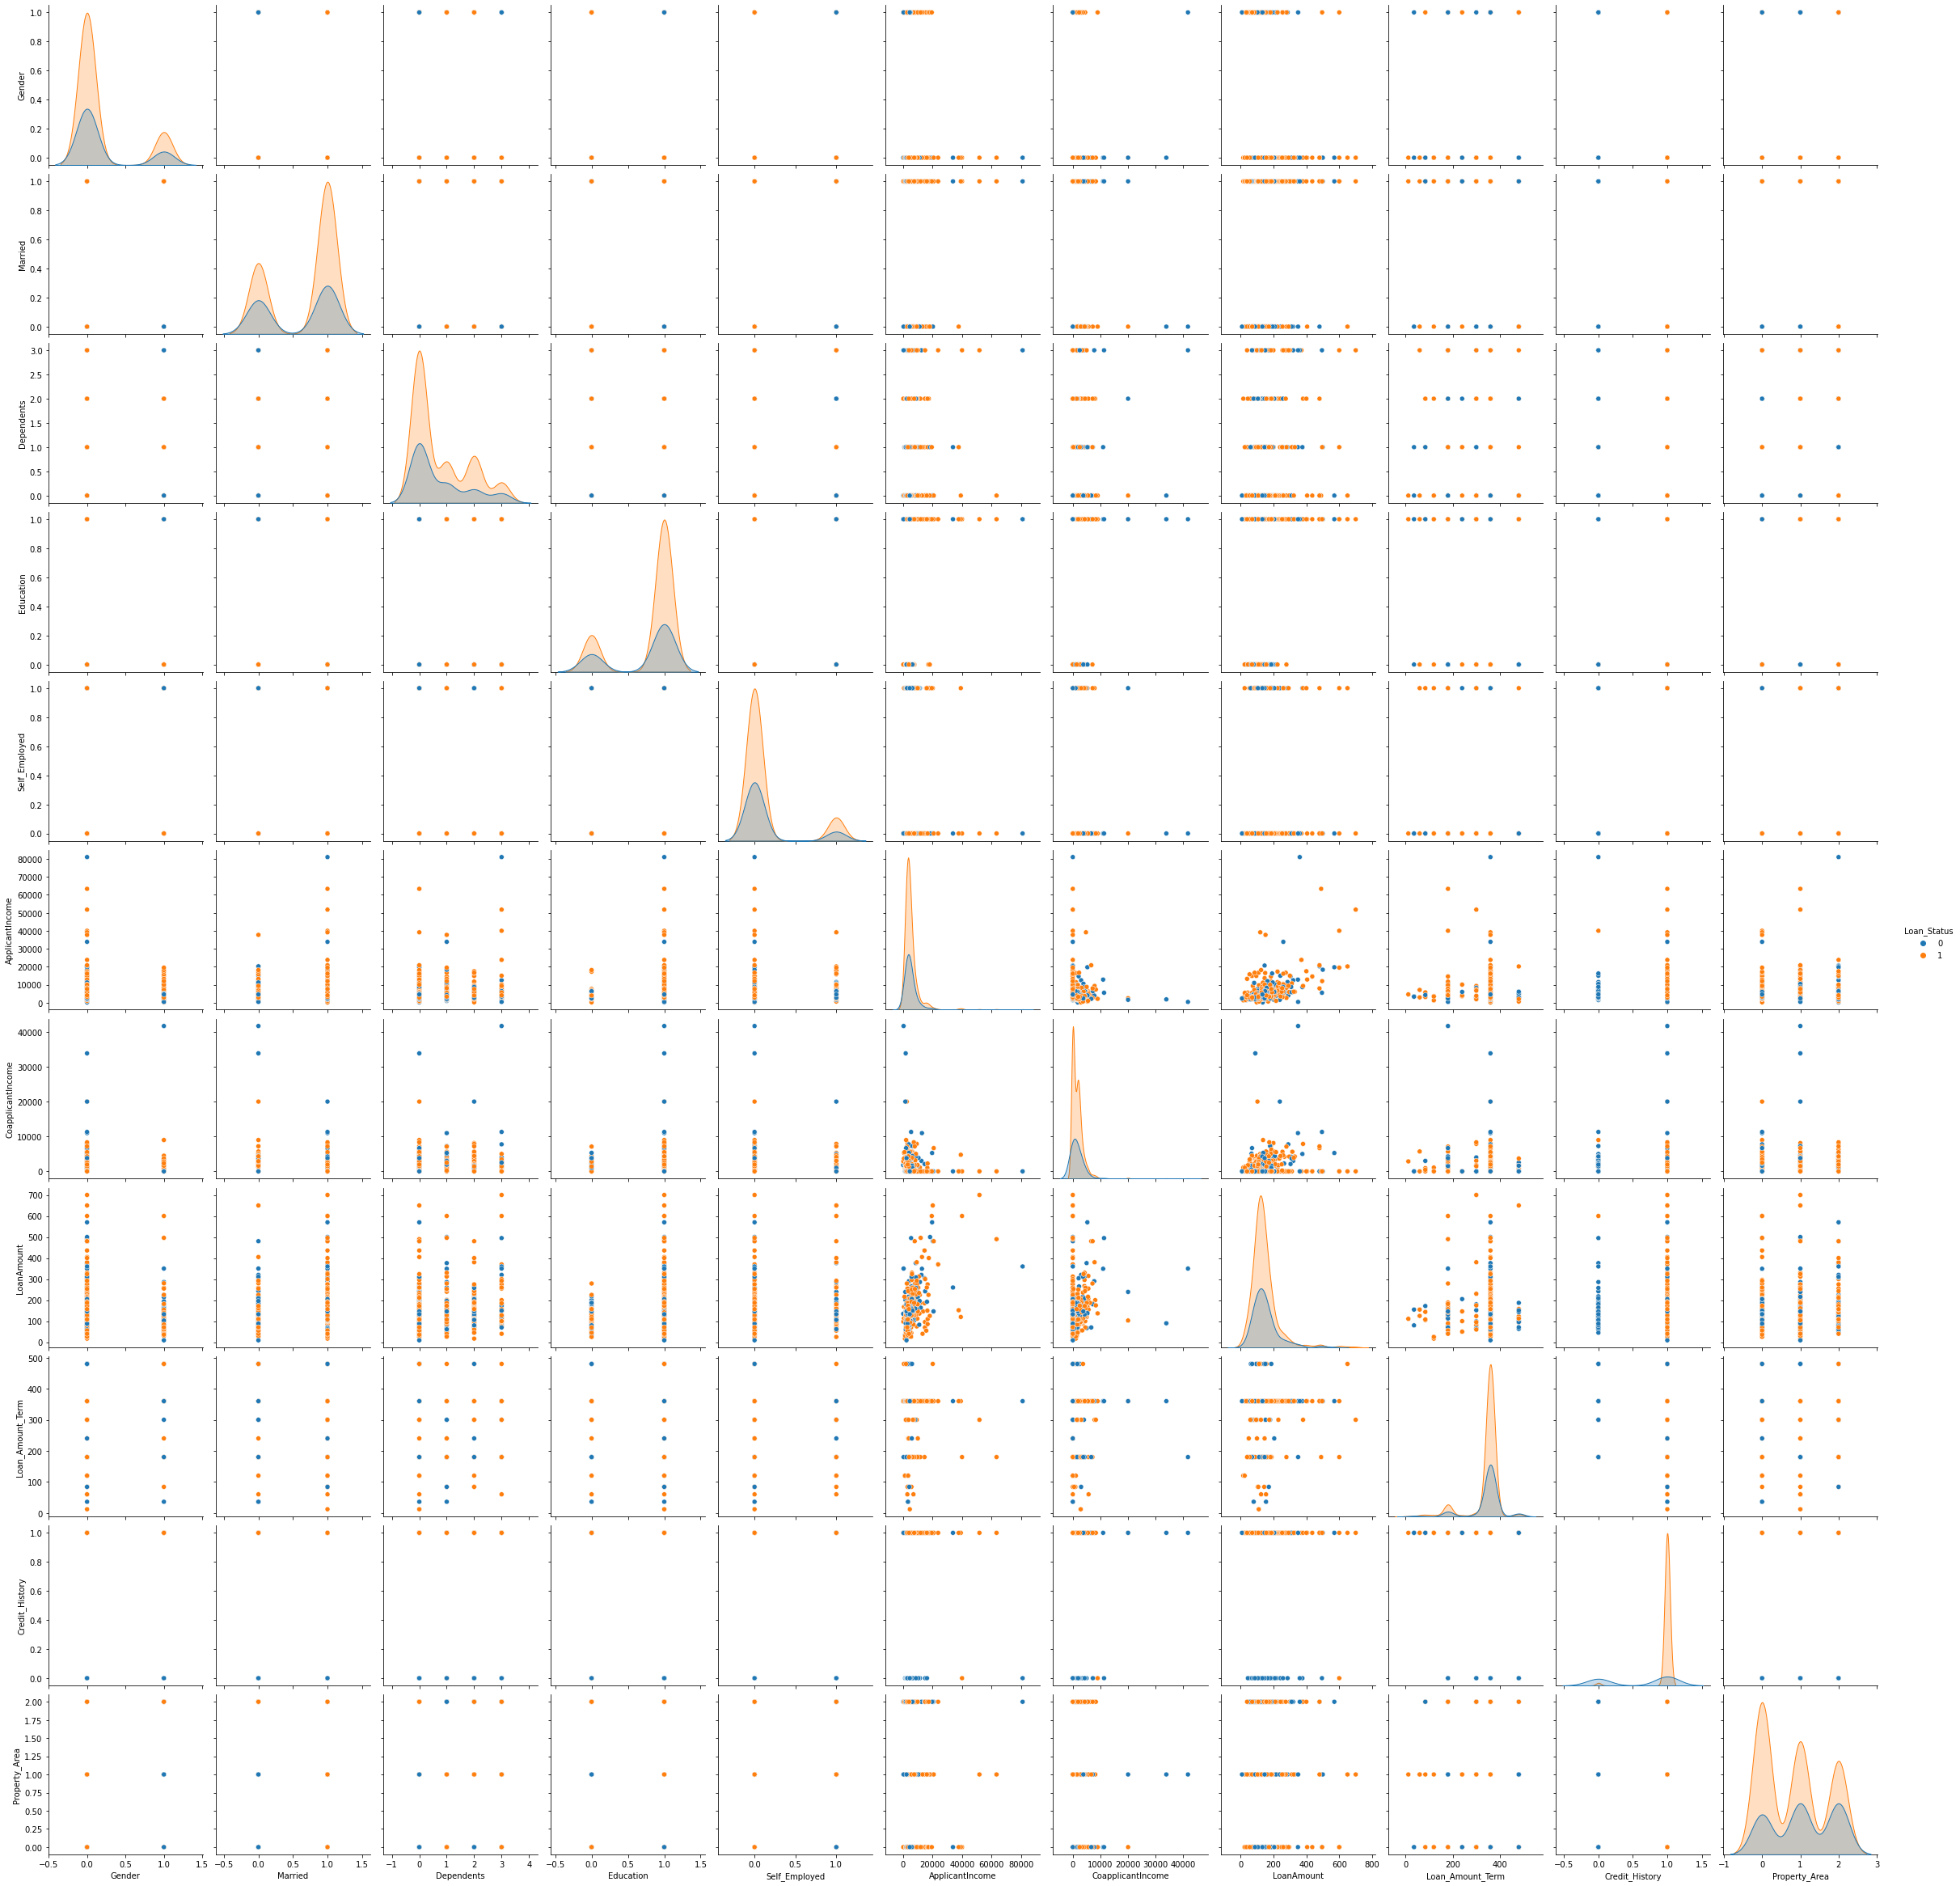

In [83]:
sns.pairplot(df, hue='Loan_Status', height=3, aspect=1);

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 62.5+ KB


In [29]:
# Metto come Index la colonna Loan_ID
df.set_index('Loan_ID')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,1
LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2,0
LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,1
LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,1
LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,1,0,0,1,0,2900,0.0,71.000000,360.0,1.0,2,1
LP002979,0,1,3,1,0,4106,0.0,40.000000,180.0,1.0,2,1
LP002983,0,1,1,1,0,8072,240.0,253.000000,360.0,1.0,1,1


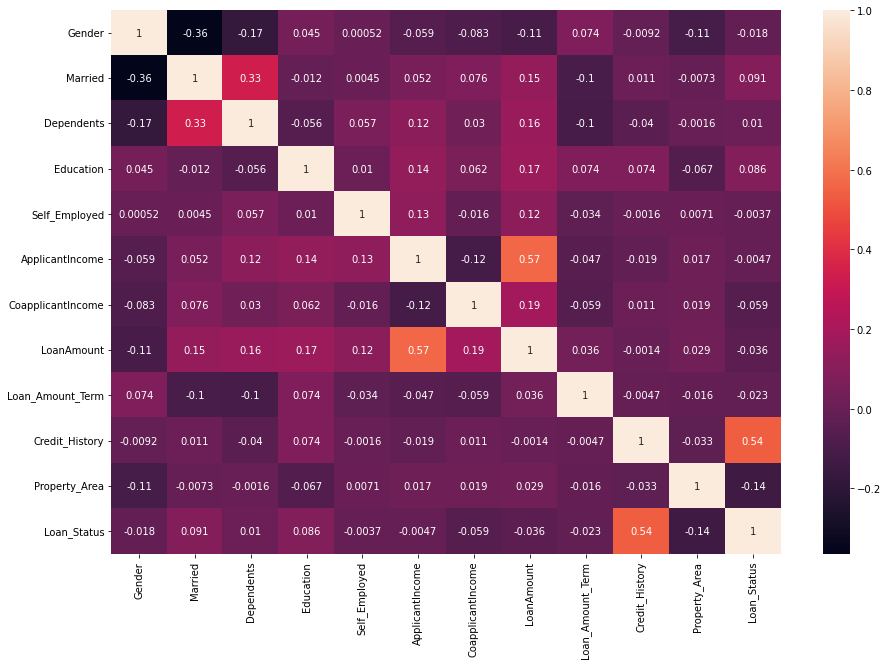

In [57]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True);

In [36]:
# separating features and target
X_ = df.drop(columns=['Loan_Status',"Loan_ID"], axis=1)
y = df['Loan_Status']

In [37]:
#standardizzazione
sc = StandardScaler()
standardized_data = sc.fit_transform(X_)
print(standardized_data)

[[-0.47234264 -1.37208932 -0.73780632 ...  0.2732313   0.41173269
   0.10798877]
 [-0.47234264  0.72881553  0.25346957 ...  0.2732313   0.41173269
   1.33586108]
 [-0.47234264  0.72881553 -0.73780632 ...  0.2732313   0.41173269
   0.10798877]
 ...
 [-0.47234264  0.72881553  0.25346957 ...  0.2732313   0.41173269
   0.10798877]
 [-0.47234264  0.72881553  1.24474546 ...  0.2732313   0.41173269
   0.10798877]
 [ 2.11710719 -1.37208932 -0.73780632 ...  0.2732313  -2.42876026
  -1.11988354]]


In [38]:
X = standardized_data

In [40]:
# Split the dataset into 70% Training and 30% Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=667
                                                    )

In [76]:
#importance delle features
bestmodel = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=5)
bestmodel.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=667)

Text(0.5, 0, 'Relative Importance')

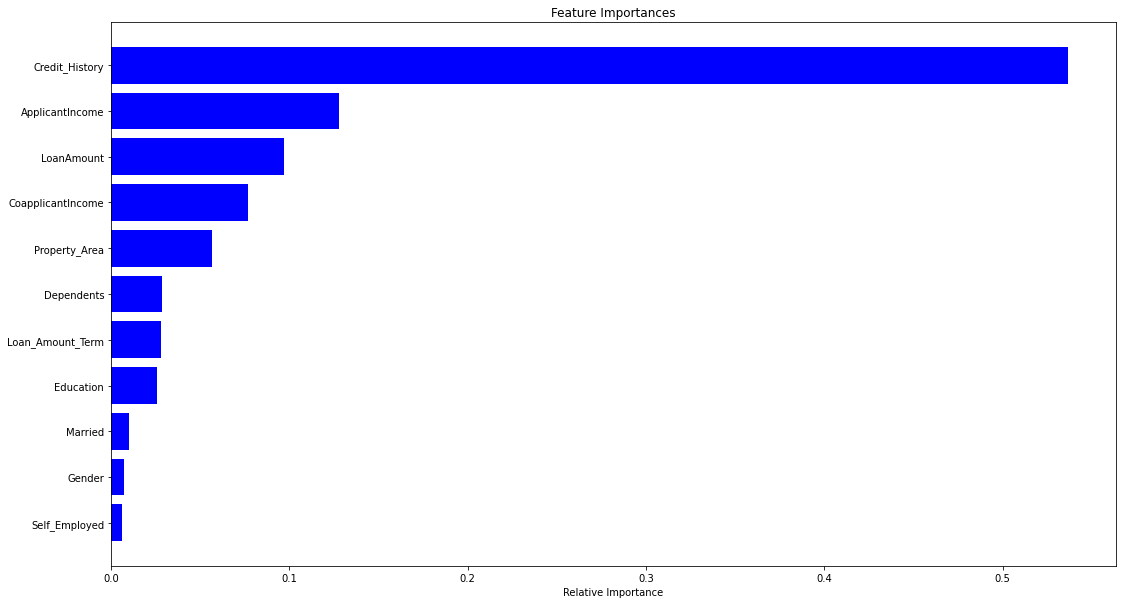

In [77]:
#Feature importance for Random Forest
features = X_.columns
importances = bestmodel.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(18,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

In [70]:
# Using simple Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth=4)
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.745945945945946

In [60]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=200)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.745945945945946

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
gb_clf.score(X_test, y_test)

0.7189189189189189

In [62]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test, y_test)

0.8

In [63]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(X_train,y_train)
nb_clf.score(X_test, y_test)

0.8

In [64]:
## Build a K-Nearest Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=2)
knn_clf.fit(X_train,y_train)
knn_clf.score(X_test, y_test)

0.6162162162162163

In [65]:
from sklearn.svm import SVC

svm_clf = SVC(probability=True)
svm_clf.fit(X_train,y_train)
svm_clf.score(X_test, y_test)

0.7891891891891892

In [66]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train,y_train)
xgb_clf.score(X_test, y_test)

0.7405405405405405

In [52]:
classifiers = [DecisionTreeClassifier(max_depth=4), 
               RandomForestClassifier(n_estimators=200),
               GradientBoostingClassifier(n_estimators=100),
               LogisticRegression(max_iter=1000),
               GaussianNB(),
               KNeighborsClassifier(n_neighbors=2),
               SVC(probability=True),
               XGBClassifier()
               ]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=667)

for cls in classifiers:
    cls.fit(X_train, y_train)
    cls.predict(X_test)

In [67]:
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

featu=[]
for i in range(2,len(X_.columns)):
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
    classifier = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=8)
    pipe = Pipeline([
                    ('scaler', StandardScaler()),
                    ('featureselection',rfe),
                    ('classifier',classifier)
                    ])
    pipe.fit(X_train,y_train)
    test_y_pred = pipe.predict(X_test)
    test_acc = accuracy_score(y_test, test_y_pred)
    y_pred_proba = pipe.predict_proba(X_test)[::,1]
    roc_auc = roc_auc_score(y_test,y_pred_proba)
    featu.append(roc_auc)
    # summarize progress
    print('feature selected %d, Acc.Test: %.3f, AUC: %.3f' % (i, test_acc, roc_auc ))

print('\n Best number of feature selection is: %d' % (np.argmax(featu) +2))

feature selected 2, Acc.Test: 0.741, AUC: 0.652
feature selected 3, Acc.Test: 0.730, AUC: 0.572
feature selected 4, Acc.Test: 0.762, AUC: 0.626
feature selected 5, Acc.Test: 0.757, AUC: 0.605
feature selected 6, Acc.Test: 0.768, AUC: 0.656
feature selected 7, Acc.Test: 0.762, AUC: 0.620
feature selected 8, Acc.Test: 0.778, AUC: 0.656
feature selected 9, Acc.Test: 0.768, AUC: 0.665
feature selected 10, Acc.Test: 0.784, AUC: 0.654

 Best number of feature selection is: 9


>1, train: 0.814, test: 0.800
>2, train: 0.816, test: 0.800
>3, train: 0.818, test: 0.805
>4, train: 0.828, test: 0.789
>5, train: 0.839, test: 0.784
>6, train: 0.855, test: 0.778
>7, train: 0.872, test: 0.778
>8, train: 0.907, test: 0.778
>9, train: 0.937, test: 0.768
>10, train: 0.951, test: 0.773
>11, train: 0.970, test: 0.768
>12, train: 0.993, test: 0.762
>13, train: 0.998, test: 0.768
>14, train: 0.998, test: 0.751
>15, train: 0.998, test: 0.751
>16, train: 1.000, test: 0.757
>17, train: 1.000, test: 0.741
>18, train: 1.000, test: 0.741
>19, train: 1.000, test: 0.741
>20, train: 1.000, test: 0.746


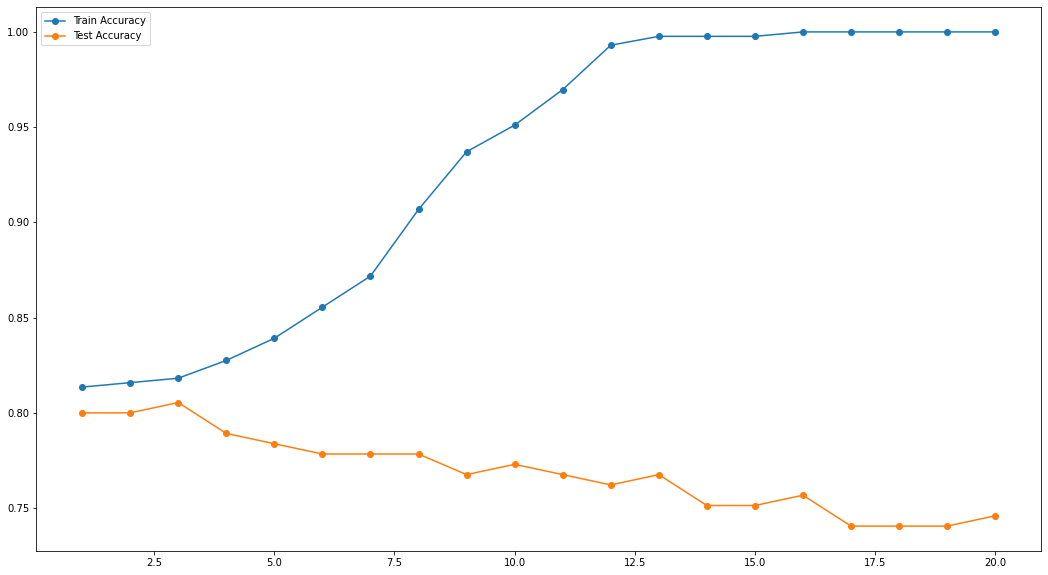

In [68]:
from sklearn.ensemble import RandomForestClassifier

train_scores, test_scores = [],[]
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_y_pred = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_y_pred)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_y_pred = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_y_pred)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth

plt.figure(figsize=(18,10))
plt.plot(values, train_scores, '-o', label='Train Accuracy')
plt.plot(values, test_scores, '-o', label='Test Accuracy')
plt.legend()

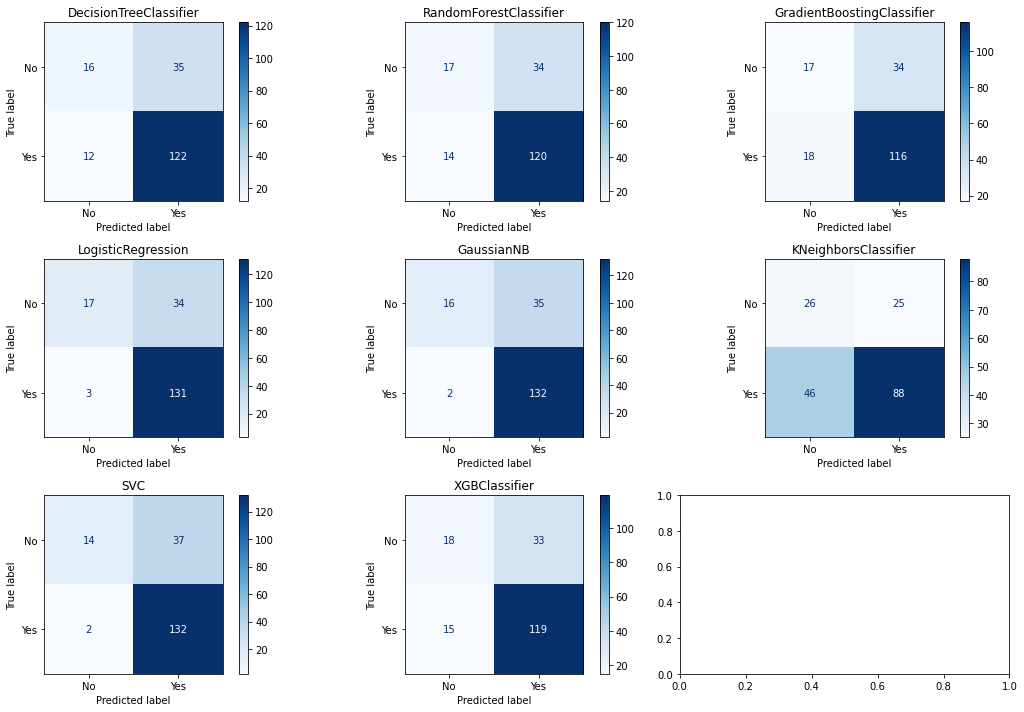

In [73]:
from sklearn.metrics import plot_confusion_matrix

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))

for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues',
                         display_labels=['No','Yes'])
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
#plt.show()

In [74]:
from sklearn.metrics import classification_report
for cls, ax in zip(classifiers, axes.flatten()):
    print(cls)
    print(classification_report(y_test,cls.predict(X_test)))

DecisionTreeClassifier(max_depth=4)
              precision    recall  f1-score   support

           0       0.57      0.31      0.41        51
           1       0.78      0.91      0.84       134

    accuracy                           0.75       185
   macro avg       0.67      0.61      0.62       185
weighted avg       0.72      0.75      0.72       185

RandomForestClassifier(n_estimators=200)
              precision    recall  f1-score   support

           0       0.55      0.33      0.41        51
           1       0.78      0.90      0.83       134

    accuracy                           0.74       185
   macro avg       0.66      0.61      0.62       185
weighted avg       0.72      0.74      0.72       185

GradientBoostingClassifier()
              precision    recall  f1-score   support

           0       0.49      0.33      0.40        51
           1       0.77      0.87      0.82       134

    accuracy                           0.72       185
   macro avg       0.6

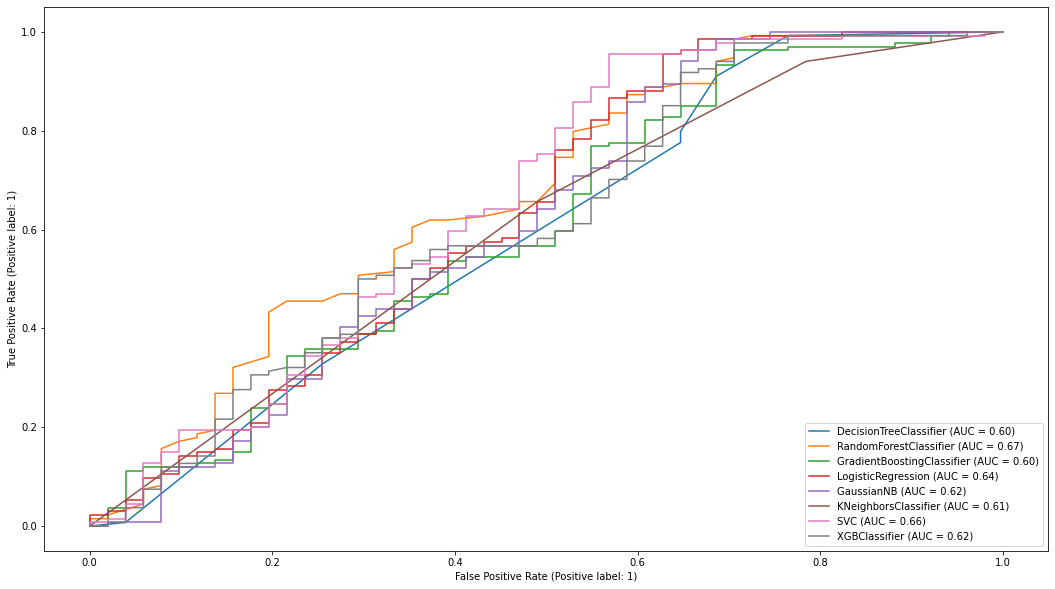

In [75]:
from sklearn.metrics import plot_roc_curve

plt.figure(figsize=(18,10))
ax = plt.gca()

for cls in classifiers:
    cls.fit(X_train, y_train)
    plot_roc_curve(cls, X_test, y_test, ax=ax)

##PIPELINE

In [80]:
rfe = RFE(estimator=RandomForestClassifier(random_state=667, n_estimators=100,max_depth=3), n_features_to_select=11)
classifier = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=3)

pipe = Pipeline([
                ('scaler', StandardScaler()),
                ('featureselection',rfe),
                ('classifier',classifier)
                ])
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('featureselection',
                 RFE(estimator=RandomForestClassifier(max_depth=3,
                                                      random_state=667),
                     n_features_to_select=11)),
                ('classifier',
                 RandomForestClassifier(max_depth=3, random_state=667))])

In [81]:
input_data = [0,1,3,1,0,4000,240,80,360,1,2]

prediction = pipe.predict([input_data])
print(prediction[0])

### Binary Classification ###
if (prediction[0]==1):
  print('Yes')
else:
  print('No')

1
Yes


In [84]:
#save pipeline model
import joblib
joblib.dump(pipe,'pipe_loan.pkl')

['pipe_loan.pkl']

In [85]:
#Load model
uploaded_model = joblib.load('pipe_loan.pkl')

uploaded_model.predict([input_data])[0] 

1